In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
pd.set_option('display.max_columns', None)

In [80]:
df = pd.read_csv("../data/NBA/Player Totals.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

In [81]:
for k, v in df.items():
    print(k, v.dtype)

seas_id int64
season int64
player_id int64
player string
birth_year float64
pos string
age float64
experience int64
lg string
tm string
g int64
gs float64
mp float64
fg int64
fga int64
fg_percent float64
x3p float64
x3pa float64
x3p_percent float64
x2p int64
x2pa int64
x2p_percent float64
e_fg_percent float64
ft int64
fta int64
ft_percent float64
orb float64
drb float64
trb float64
ast int64
stl float64
blk float64
tov float64
pf int64
pts int64


In [82]:
print(len(df))

32392


In [76]:
print(df.sample(n=10, random_state=42))

       seas_id  season  player_id            player  birth_year    pos   age  \
9999     22496    2010       3132      Larry Hughes         NaN     SG  31.0   
8370     24371    2013       3634    Raymond Felton         NaN     PG  28.0   
2265     29972    2022       4725   Jalen McDaniels         NaN     SF  24.0   
19039    13412    1993       2666     Larry Johnson      1969.0     PF  23.0   
11401    21561    2008       3225  Wally Szczerbiak         NaN     SF  30.0   
12902    19724    2005       3276       Mike Miller         NaN     SF  24.0   
17125    15478    1997       2191      Michael Cage         NaN      C  35.0   
15405    16936    2000       2513         J.R. Reid         NaN     PF  31.0   
3662     28500    2020       4617        Gary Clark         NaN     PF  25.0   
18068    14305    1995       2177     Jay Humphries         NaN  SG-PG  32.0   

       experience   lg   tm   g    gs      mp   fg   fga  fg_percent    x3p  \
9999           12  NBA  TOT  45  16.0  1

In [84]:
df = pd.read_csv("data/player_totals.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})
df = df[df['lg'] == 'NBA']
df = df[df['season'] >= 1955]

columns = [
    'birth_year', 'lg', 'tm', 'fg_percent', 'x3p_percent', 
    'x2p_percent', 'e_fg_percent', 'ft_percent'
]
df = df.drop(columns=columns)

agg_rules = {
    'seas_id': 'max',
    'season': 'max',
    'age': 'max',
    'experience': 'max',
    'pos': lambda x: x.mode()[0] if not x.mode().empty else None,
    'g': 'sum', 'gs': 'sum', 'mp': 'sum', 'fg': 'sum', 'fga': 'sum',
    'x3p': 'sum', 'x3pa': 'sum', 'x2p': 'sum', 'x2pa': 'sum',
    'ft': 'sum', 'fta': 'sum', 'orb': 'sum', 'drb': 'sum', 'trb': 'sum',
    'ast': 'sum', 'stl': 'sum', 'blk': 'sum', 'tov': 'sum', 'pf': 'sum', 'pts': 'sum'
}
df = df.groupby(['player_id', 'player'], as_index=False).agg(agg_rules)

df['fg_percent'] = (df['fg'] / df['fga']).fillna(0).round(3)
df['x3p_percent'] = (df['x3p'] / df['x3pa']).fillna(0).round(3)
df['x2p_percent'] = (df['x2p'] / df['x2pa']).fillna(0).round(3)
df['e_fg_percent'] = ((df['fg'] + 0.5 * df['x3p']) / df['fga']).fillna(0).round(3)
df['ft_percent'] = (df['ft'] / df['fta']).fillna(0).round(3)

df = df[df['pos'].isin(['PG', 'SG', 'SF', 'PF', 'C'])]

numeric_cols = ['pts', 'ast', 'stl', 'blk', 'trb', 'g']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df_wilt = df[df['player'] == 'Magic Johnson']

In [85]:
print(df['g'].mean())

312.79118942731276


In [50]:
display(df_wilt)

,player_id,player,seas_id,season,age,experience,pos,g,gs,mp,fg,fga,x3p,x3pa,x2p,x2pa,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_percent,x3p_percent,x2p_percent,e_fg_percent,ft_percent
1099,1878,Magic Johnson,14887,1996,36.0,13,PG,906,763.0,33245.0,6211,11951,325.0,1074.0,5886,10877,4960,5850,1601.0,4958.0,6559.0,10141,1724.0,374.0,3506.0,2050,17707,0.52,0.303,0.541,0.533,0.848


#### Age vs Performance

In [99]:
print(2011//10)

201


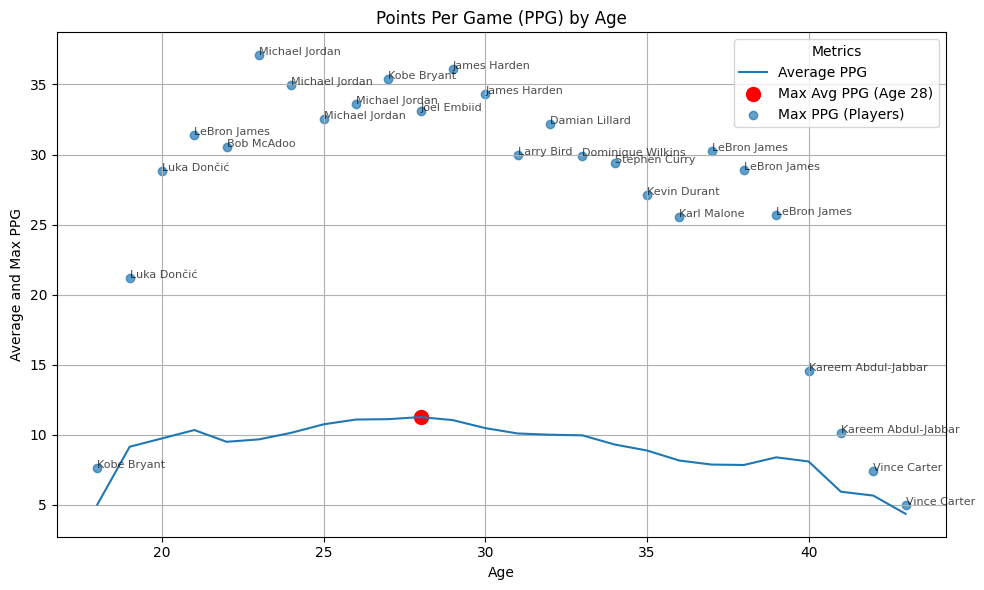

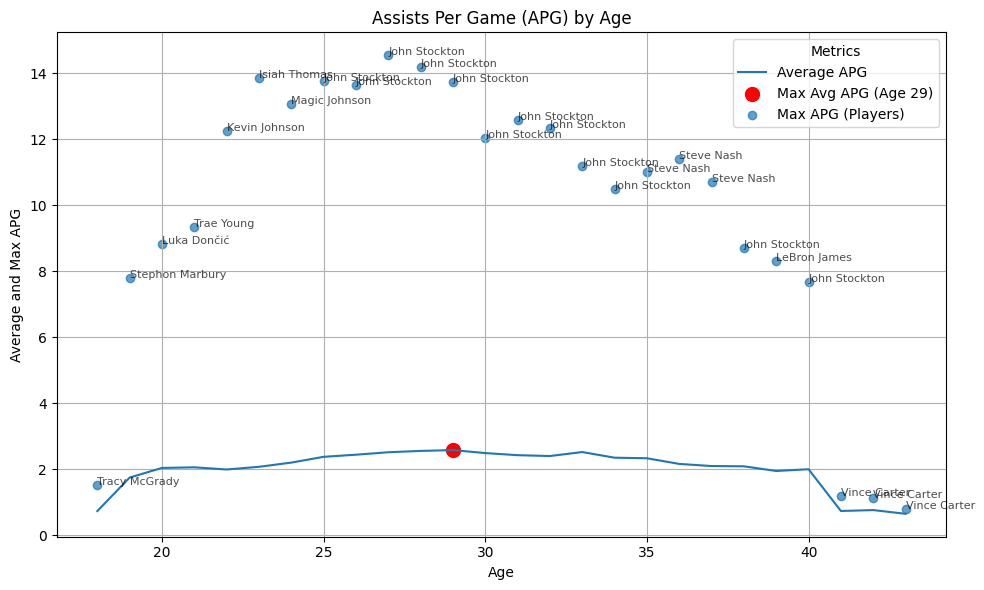

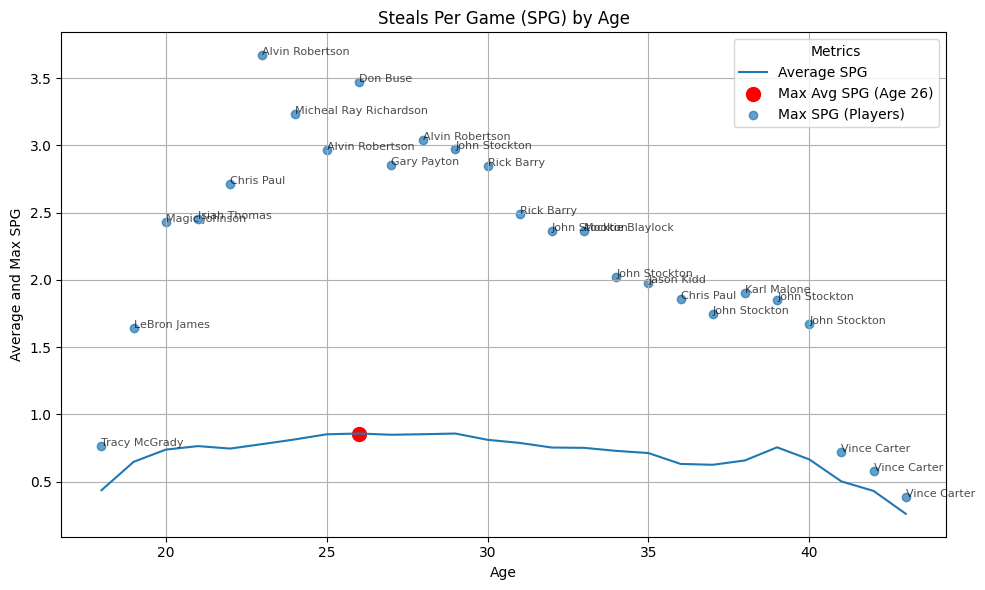

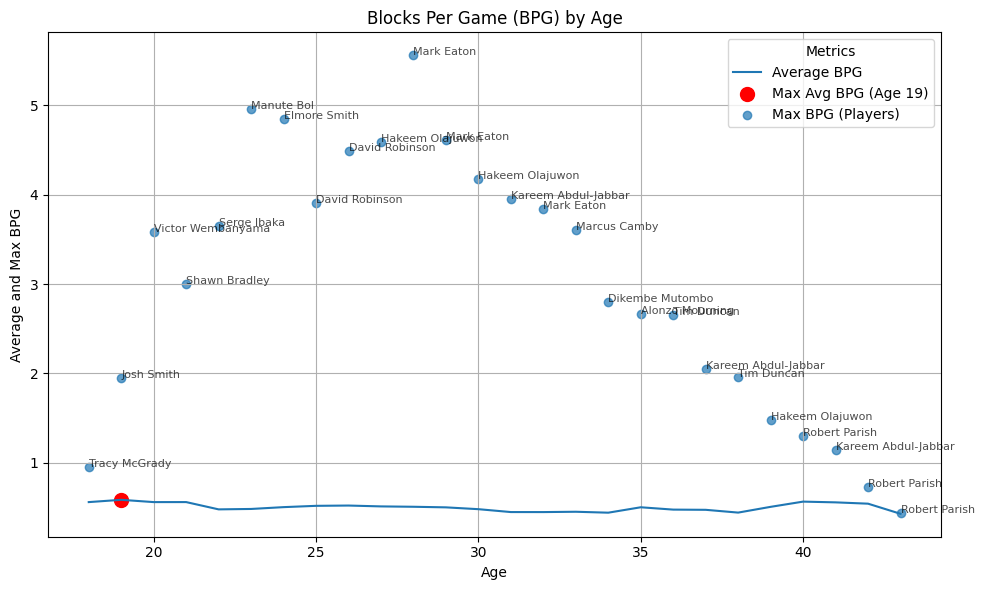

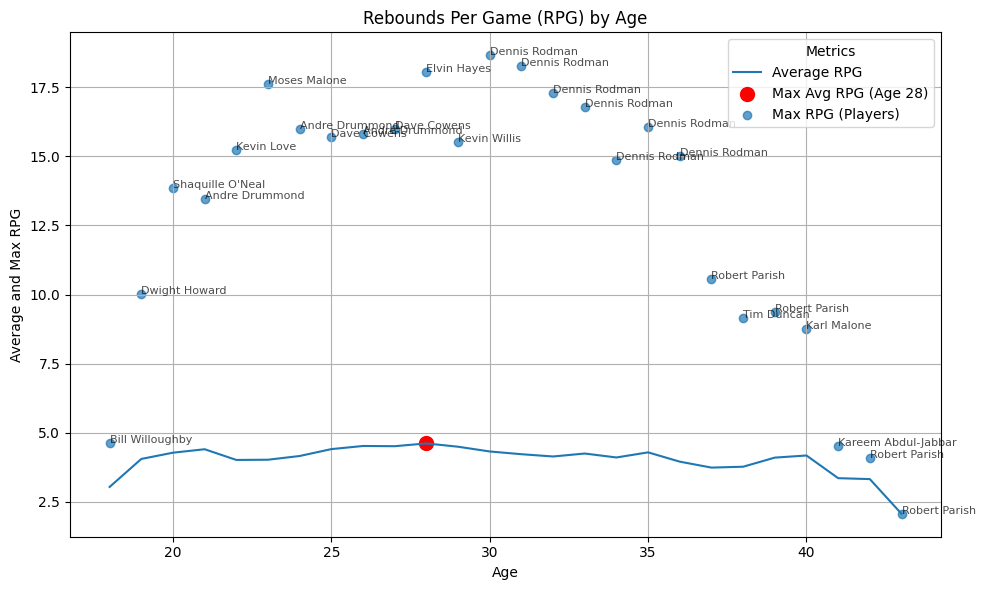

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv("../data/NBA/Player Totals.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

numeric_cols = ['age', 'pts', 'ast', 'stl', 'blk', 'trb', 'g', 'player']
df[numeric_cols[:-1]] = df[numeric_cols[:-1]].apply(pd.to_numeric, errors='coerce')

df = df[df['g'] >= 41]
df = df[df['lg'] == 'NBA']
df = df[df['season'] >= 1955]

# Calculate per-game stats
df['ppg'] = df['pts'] / df['g']  # Points per game
df['apg'] = df['ast'] / df['g']  # Assists per game
df['spg'] = df['stl'] / df['g']  # Steals per game
df['bpg'] = df['blk'] / df['g']  # Blocks per game
df['rpg'] = df['trb'] / df['g']  # Rebounds per game

# Drop rows with missing values
df.dropna(subset=['age', 'ppg', 'apg', 'spg', 'bpg', 'rpg', 'player'], inplace=True)

# Group by age and calculate mean for each metric
age_stats = df.groupby('age')[['ppg', 'apg', 'spg', 'bpg', 'rpg']].mean().reset_index()

# Find the age with the highest average for each metric
max_avg_ages = {metric: age_stats.loc[age_stats[metric].idxmax(), 'age'] for metric in ['ppg', 'apg', 'spg', 'bpg', 'rpg']}

# Define metrics and titles
metrics = ['ppg', 'apg', 'spg', 'bpg', 'rpg']
titles = [
    'Points Per Game (PPG)', 
    'Assists Per Game (APG)', 
    'Steals Per Game (SPG)', 
    'Blocks Per Game (BPG)', 
    'Rebounds Per Game (RPG)'
]

# Plot each metric in a separate chart
for metric, title in zip(metrics, titles):
    # Identify player with the highest value for this metric per age
    max_metric_stats = df.groupby('age').apply(
        lambda x: x.loc[x[metric].idxmax()]
    ).reset_index(drop=True)

    plt.figure(figsize=(10, 6))
    # Plot the average stat
    plt.plot(age_stats['age'], age_stats[metric], label=f'Average {metric.upper()}')
    # Highlight the age with the highest average value
    max_age = max_avg_ages[metric]
    max_avg_value = age_stats.loc[age_stats['age'] == max_age, metric].values[0]
    plt.scatter(max_age, max_avg_value, color='red', label=f'Max Avg {metric.upper()} (Age {int(max_age)})', s=100)

    # Overlay max players
    plt.scatter(
        max_metric_stats['age'], 
        max_metric_stats[metric], 
        label=f'Max {metric.upper()} (Players)', 
        alpha=0.7
    )
    # Annotate players with the highest stats for this specific metric
    for i, row in max_metric_stats.iterrows():
        plt.text(
            row['age'], row[metric], 
            row['player'], fontsize=8, alpha=0.7
        )
    plt.title(f'{title} by Age')
    plt.xlabel('Age')
    plt.ylabel(f'Average and Max {metric.upper()}')
    plt.legend(title='Metrics')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/player_totals.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})
df = df[df['lg'] == 'NBA']
df = df[df['season'] >= 1955]

columns = [
    'birth_year', 'lg', 'tm', 'fg_percent', 'x3p_percent', 
    'x2p_percent', 'e_fg_percent', 'ft_percent', 'player_id'
]
df = df.drop(columns=columns)

agg_rules = {
    'seas_id': 'max',
    'season': 'max',
    'age': 'max',
    'experience': 'max',
    'pos': lambda x: x.mode()[0] if not x.mode().empty else None,
    'g': 'sum', 'gs': 'sum', 'mp': 'sum', 'fg': 'sum', 'fga': 'sum',
    'x3p': 'sum', 'x3pa': 'sum', 'x2p': 'sum', 'x2pa': 'sum',
    'ft': 'sum', 'fta': 'sum', 'orb': 'sum', 'drb': 'sum', 'trb': 'sum',
    'ast': 'sum', 'stl': 'sum', 'blk': 'sum', 'tov': 'sum', 'pf': 'sum', 'pts': 'sum'
}
df = df.groupby(['player'], as_index=False).agg(agg_rules)

df['fg_percent'] = (df['fg'] / df['fga']).fillna(0).round(3)
df['x3p_percent'] = (df['x3p'] / df['x3pa']).fillna(0).round(3)
df['x2p_percent'] = (df['x2p'] / df['x2pa']).fillna(0).round(3)
df['e_fg_percent'] = ((df['fg'] + 0.5 * df['x3p']) / df['fga']).fillna(0).round(3)
df['ft_percent'] = (df['ft'] / df['fta']).fillna(0).round(3)

In [101]:
df = df[df['pos'].isin(['PG', 'SG', 'SF', 'PF', 'C'])]

numeric_cols = ['pts', 'ast', 'stl', 'blk', 'trb', 'g']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculate per-game stats
df['ppg'] = df['pts'] / df['g']  # Points per game
df['apg'] = df['ast'] / df['g']  # Assists per game
df['spg'] = df['stl'] / df['g']  # Steals per game
df['bpg'] = df['blk'] / df['g']  # Blocks per game
df['rpg'] = df['trb'] / df['g']  # Rebounds per game

df['main_pos'] = df['pos'].str.split('-').str[0]

position_stats = df.groupby('main_pos').apply(
    lambda group: pd.Series({
        'PPG': group['pts'].sum() / group['g'].sum(),
        'APG': group['ast'].sum() / group['g'].sum(),
        'SPG': group['stl'].sum() / group['g'].sum(),
        'BPG': group['blk'].sum() / group['g'].sum(),
        'RPG': group['trb'].sum() / group['g'].sum(),
    })
).reset_index()


# Order the positions
position_order = ['PG', 'SG', 'SF', 'PF', 'C']
position_stats = position_stats[position_stats['main_pos'].isin(position_order)]
position_stats['main_pos'] = pd.Categorical(position_stats['main_pos'], categories=position_order, ordered=True)
position_stats.sort_values('main_pos', inplace=True)

# Find the position with the highest average for each metric
max_avg_positions = {metric: position_stats.loc[position_stats[metric].idxmax(), 'main_pos'] for metric in ['ppg', 'apg', 'spg', 'bpg', 'rpg']}

# Define metrics and titles
metrics = ['ppg', 'apg', 'spg', 'bpg', 'rpg']
titles = [
    'Points Per Game (PPG)', 
    'Assists Per Game (APG)', 
    'Steals Per Game (SPG)', 
    'Blocks Per Game (BPG)', 
    'Rebounds Per Game (RPG)'
]

# Plot each metric in a separate chart
for metric, title in zip(metrics, titles):
    # Identify player with the highest value for this metric per position
    max_metric_stats = df.groupby('main_pos').apply(
        lambda x: x.loc[x[metric].idxmax()]
    ).reset_index(drop=True)

    plt.figure(figsize=(10, 6))
    # Plot the average stat
    plt.bar(position_stats['main_pos'], position_stats[metric], label=f'Average {metric.upper()}', alpha=0.7)
    # Highlight the position with the highest average value
    max_pos = max_avg_positions[metric]
    max_avg_value = position_stats.loc[position_stats['main_pos'] == max_pos, metric].values[0]
    plt.bar(max_pos, max_avg_value, color='red', label=f'Max Avg {metric.upper()} ({max_pos})')

    # Annotate players with the highest stats for this specific metric
    for i, row in max_metric_stats.iterrows():
        plt.text(
            row['main_pos'], row[metric] + 0.1, 
            row['player'], fontsize=8, ha='center', alpha=0.7
        )
    plt.title(f'{title} by Position (With Highest Players Highlighted)')
    plt.xlabel('Position')
    plt.ylabel(f'Average and Max {metric.upper()}')
    plt.legend(title='Metrics')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

KeyError: 'ppg'

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv("../data/NBA/Player Totals.csv")
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})

# df = df[df['lg'] == 'NBA']
# df = df[df['season'] >= 1955]
# df = df[df['g'] >= 41]


# numeric_cols = ['pts', 'ast', 'stl', 'blk', 'trb', 'g', 'season']
# df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


# Define the era based on the season
df['era'] = ((df['season'] // 10) * 10).astype(int).astype(str) + 's'


# Calculate per-game stats
df['PPG'] = df['pts'] / df['g']  # Points per game
df['APG'] = df['ast'] / df['g']  # Assists per game
df['SPG'] = df['stl'] / df['g']  # Steals per game
df['BPG'] = df['blk'] / df['g']  # Blocks per game
df['RPG'] = df['trb'] / df['g']  # Rebounds per game


era_stats = df.groupby('era').apply(
    lambda group: pd.Series({
        'PPG': group['pts'].sum(skipna=True) / group['g'].sum(skipna=True),
        'APG': group['ast'].sum(skipna=True) / group['g'].sum(skipna=True),
        'SPG': group['stl'].sum(skipna=True) / group['g'].sum(skipna=True),
        'BPG': group['blk'].sum(skipna=True) / group['g'].sum(skipna=True),
        'RPG': group['trb'].sum(skipna=True) / group['g'].sum(skipna=True),
    })
).reset_index()
era_stats.drop(era_stats[(era_stats[['era', 'PPG', 'APG', 'SPG', 'BPG', 'RPG']] == 0).any(axis=1)].index, inplace=True)
era_stats.reset_index(drop=True, inplace=True)

In [167]:
print(era_stats)

     era        PPG       APG       SPG       BPG       RPG
0  1970s  11.129335  2.430332  0.540522  0.297408  5.052862
1  1980s  10.548661  2.487723  0.848743  0.518777  4.238837
2  1990s   9.824387  2.282643  0.821899  0.499004  4.118923
3  2000s   9.450969  2.106996  0.743041  0.476681  4.088701
4  2010s   9.590740  2.098147  0.718833  0.454025  4.023031
5  2020s  10.390665  2.341446  0.706647  0.452033  4.088023


In [168]:
era_stats = df.groupby(['player', 'era']).apply(
    lambda group: pd.Series({
        'PPG': group['pts'].sum(skipna=True) / group['g'].sum(skipna=True),
        'APG': group['ast'].sum(skipna=True) / group['g'].sum(skipna=True),
        'SPG': group['stl'].sum(skipna=True) / group['g'].sum(skipna=True),
        'BPG': group['blk'].sum(skipna=True) / group['g'].sum(skipna=True),
        'RPG': group['trb'].sum(skipna=True) / group['g'].sum(skipna=True),
    })
).reset_index()

In [169]:
print(era_stats[era_stats['player'] == 'Kareem Abdul-Jabbar'])

                   player    era        PPG       APG       SPG       BPG  \
4204  Kareem Abdul-Jabbar  1970s  28.642950  4.450194  0.745149  2.063389   
4205  Kareem Abdul-Jabbar  1980s  20.642948  2.820839  0.742058  2.025413   

            RPG  
4204  14.825356  
4205   7.598475  


In [170]:
print(era_stats[era_stats['player'] == 'Bob McAdoo'])

         player    era        PPG       APG       SPG       BPG        RPG
740  Bob McAdoo  1970s  27.021309  2.811263  1.035008  1.579909  11.974125
741  Bob McAdoo  1980s  13.256560  1.478134  0.696793  0.839650   4.938776


In [150]:
print(era_stats[era_stats['player'] == 'Jerry West'])

          player    era        PPG       APG       SPG       BPG       RPG
2714  Jerry West  1970s  20.290323  6.645161  2.612903  0.741935  3.741935


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26220\1726729552.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


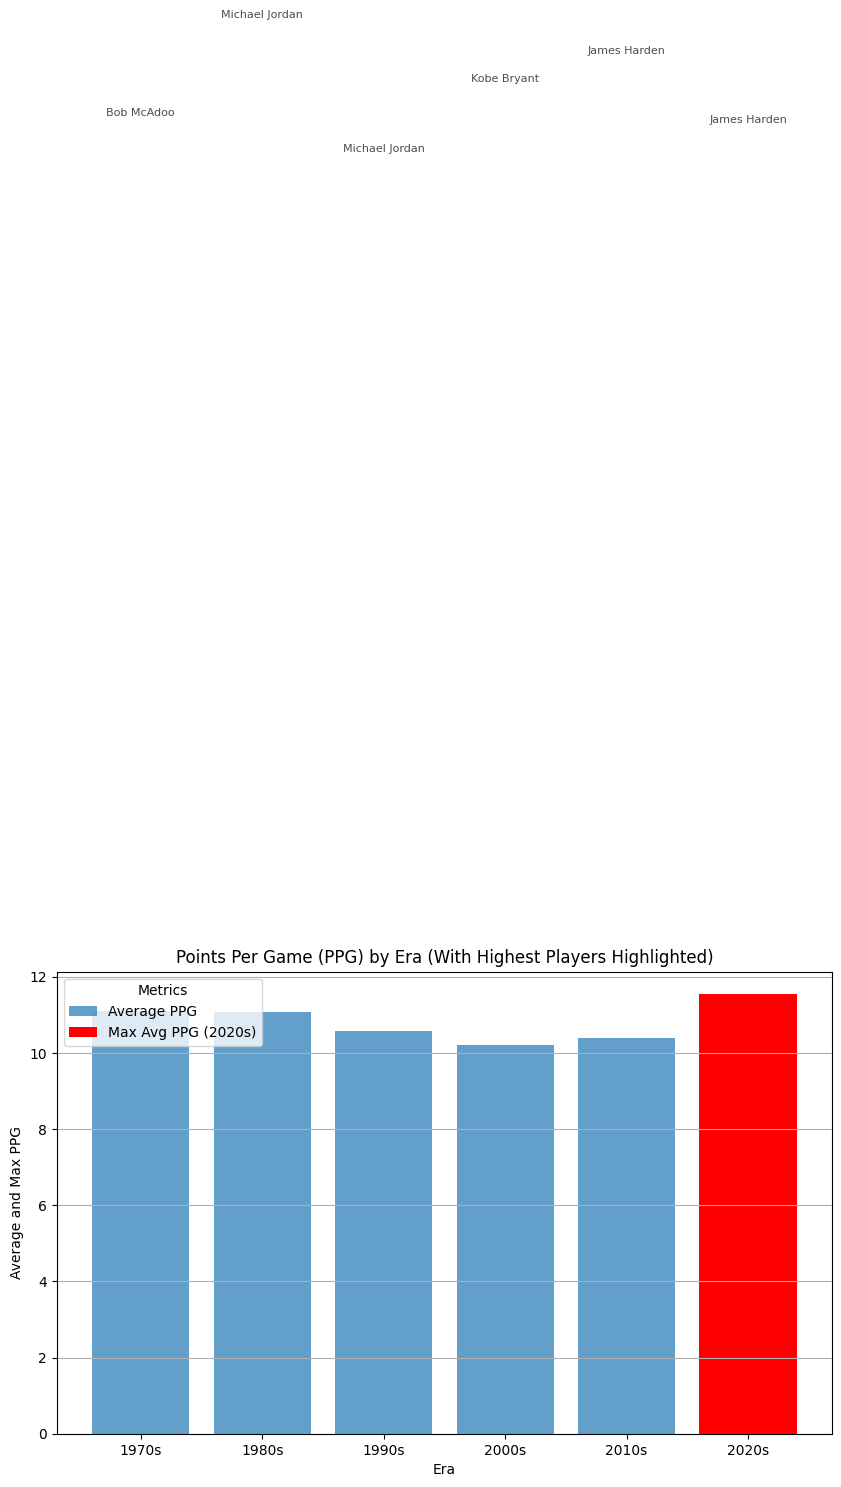

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26220\1726729552.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


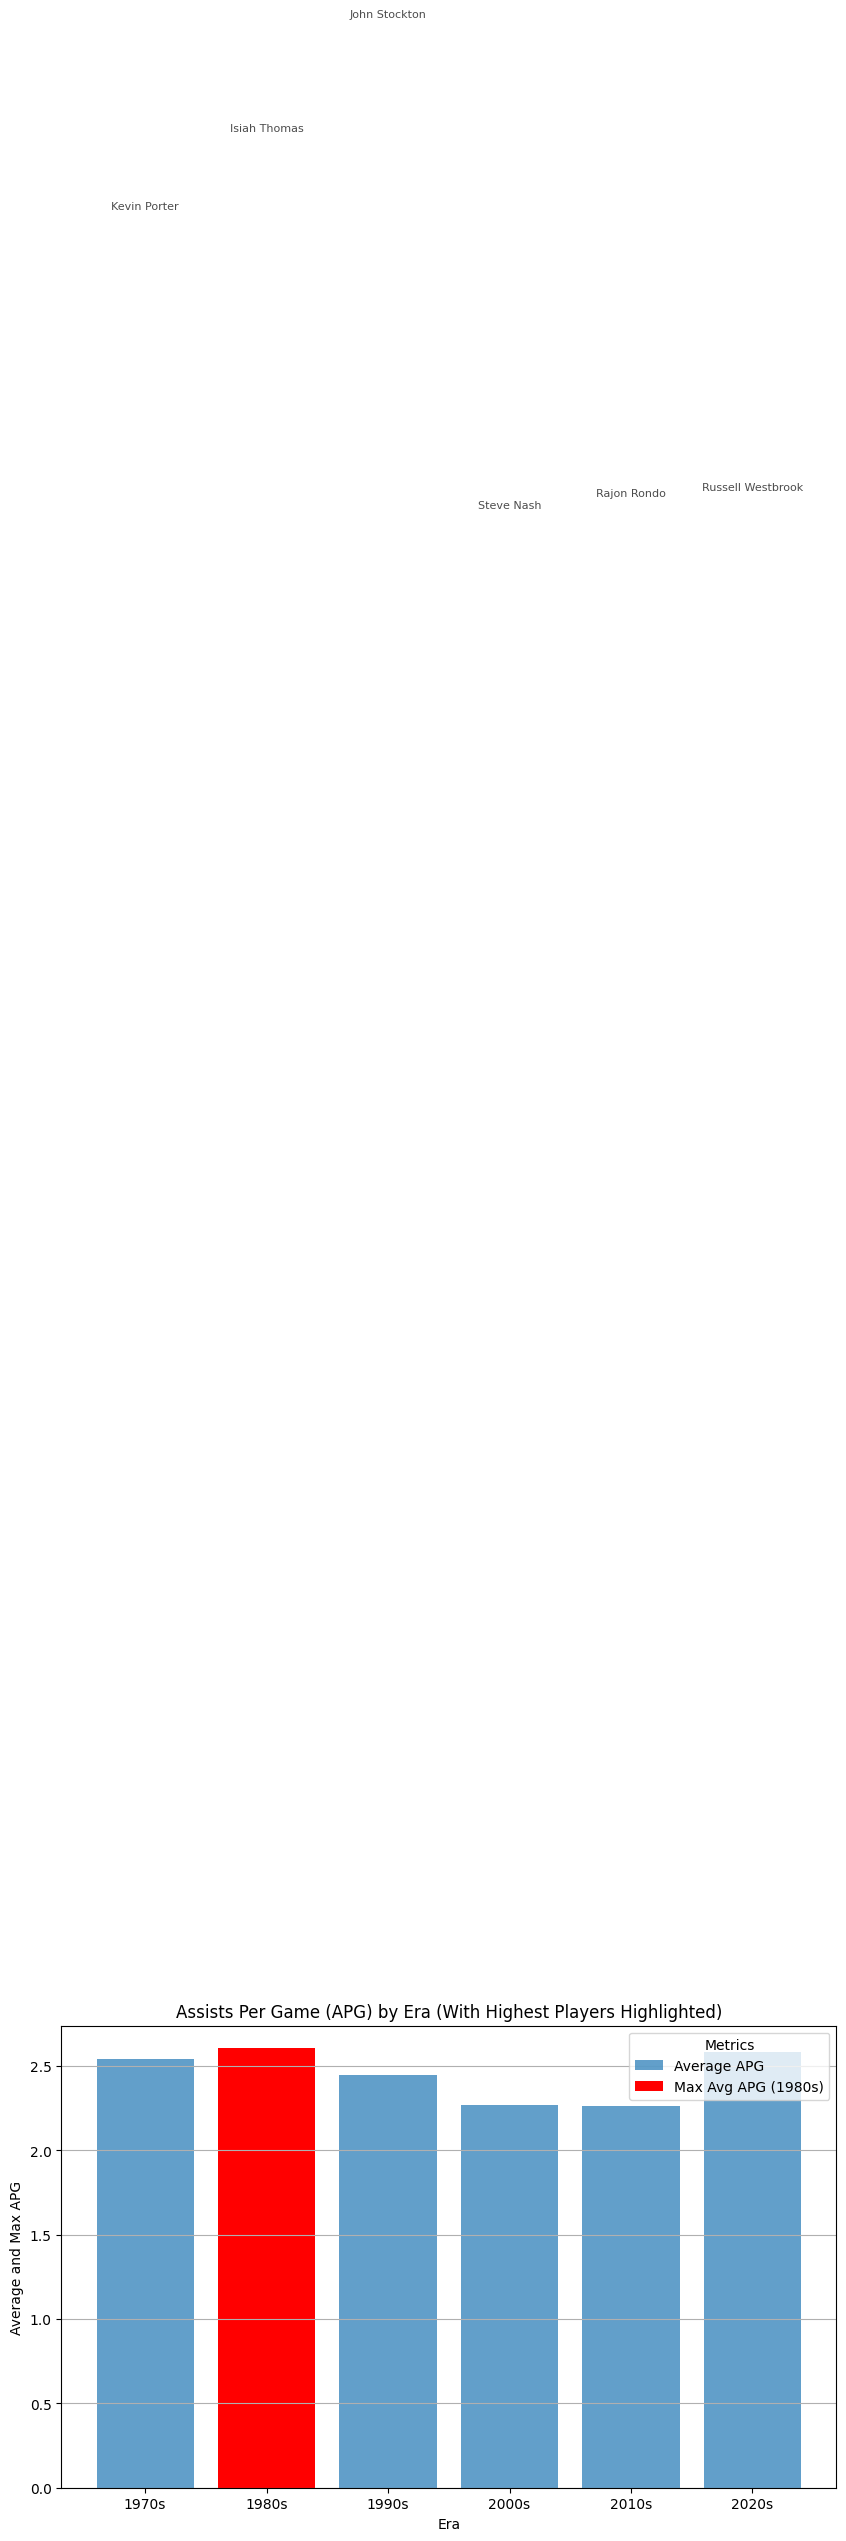

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26220\1726729552.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


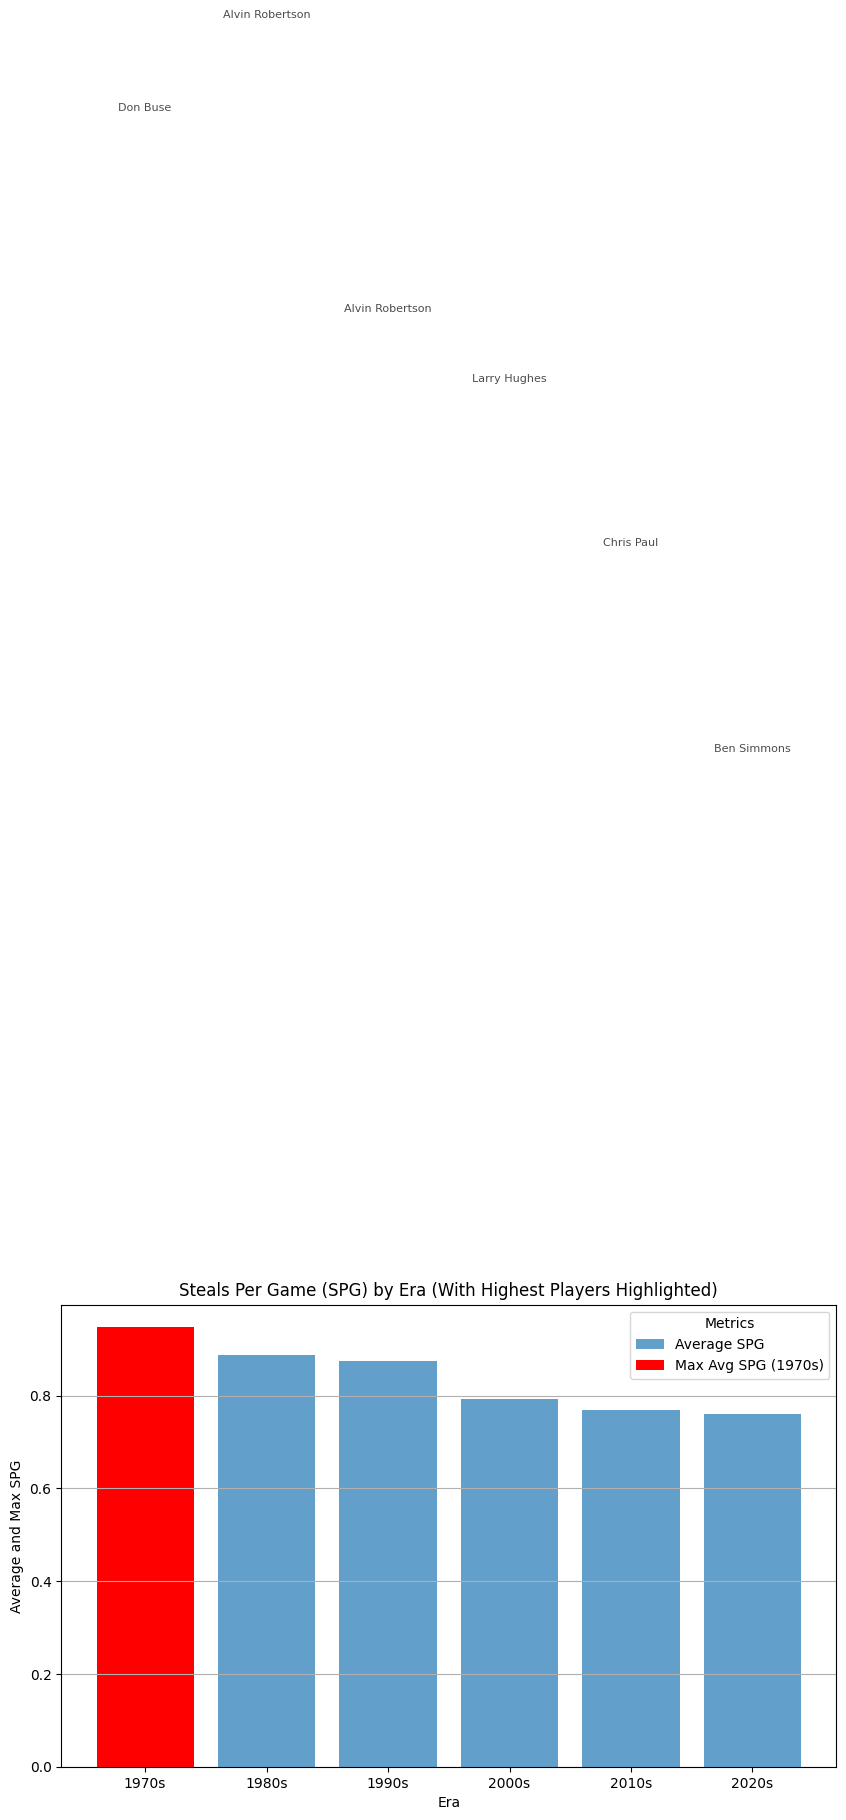

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26220\1726729552.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


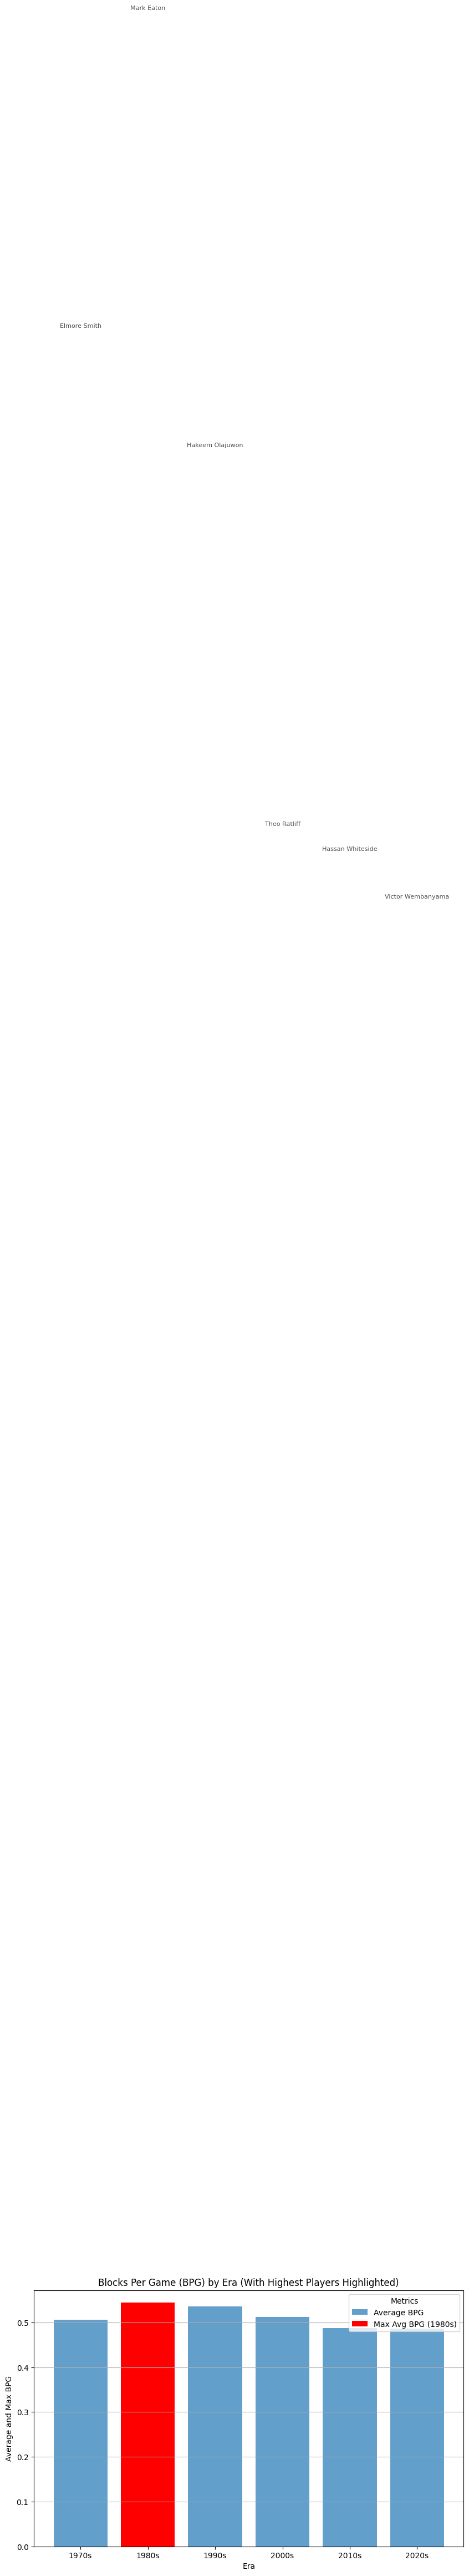

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26220\1726729552.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


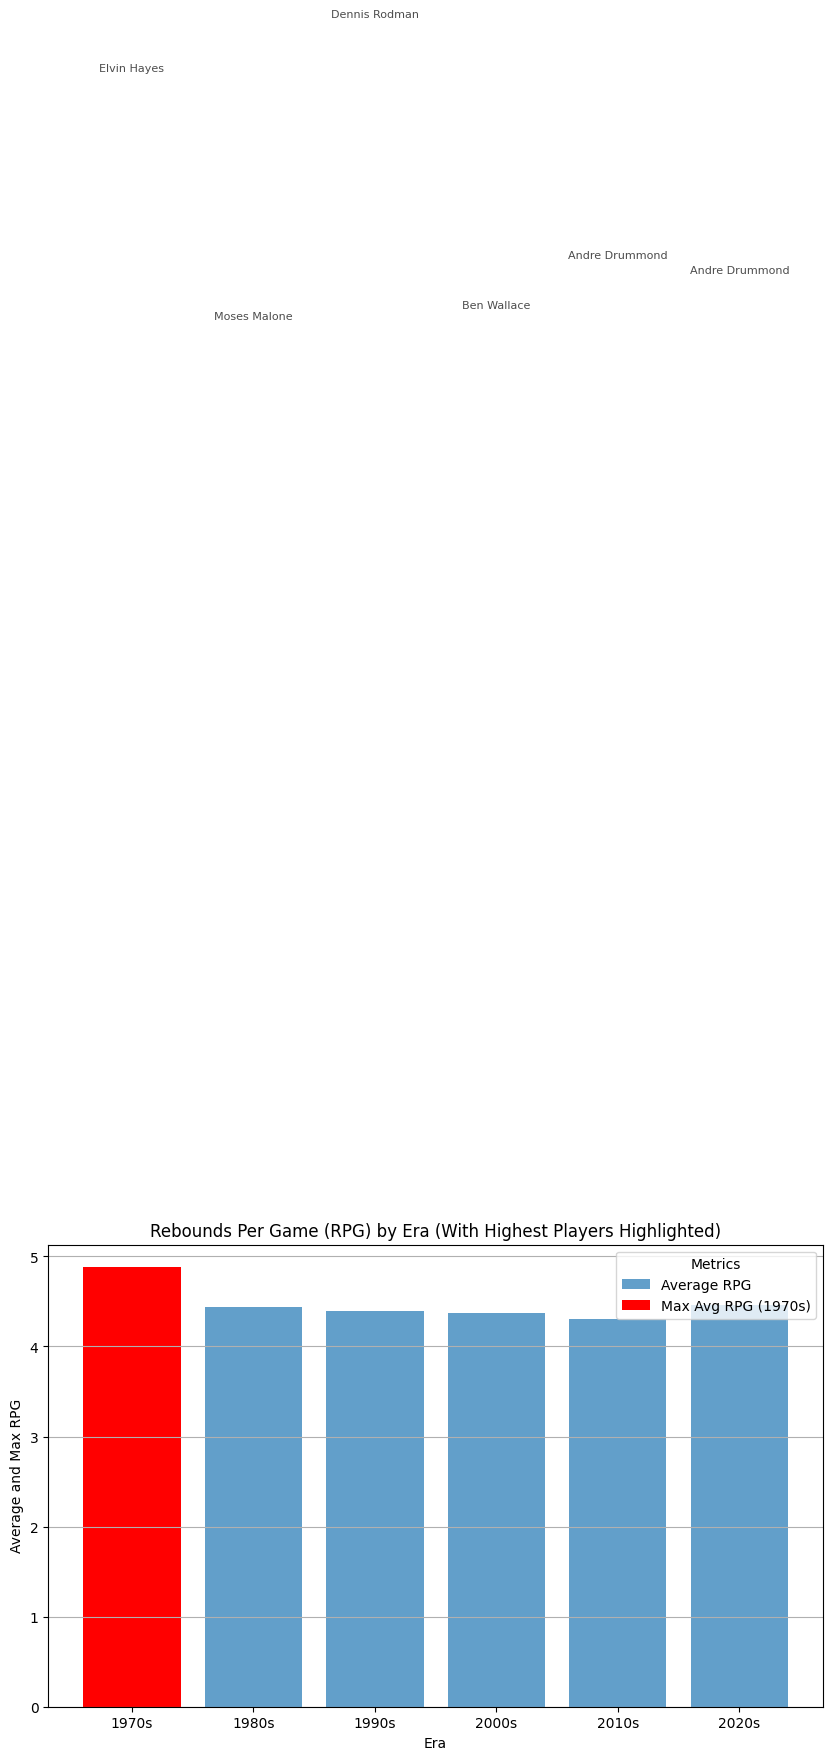

In [114]:
era_stats['era'] = pd.Categorical(era_stats['era'], categories=sorted(era_stats['era'].unique()), ordered=True)
era_stats.sort_values('era', inplace=True)

# Find the era with the highest average for each metric
max_avg_eras = {metric: era_stats.loc[era_stats[metric].idxmax(), 'era'] for metric in ['PPG', 'APG', 'SPG', 'BPG', 'RPG']}

# Define metrics and titles
metrics = ['PPG', 'APG', 'SPG', 'BPG', 'RPG']
titles = [
    'Points Per Game (PPG)', 
    'Assists Per Game (APG)', 
    'Steals Per Game (SPG)', 
    'Blocks Per Game (BPG)', 
    'Rebounds Per Game (RPG)'
]

# Plot each metric in a separate chart
for metric, title in zip(metrics, titles):
    # Identify player with the highest value for this metric per era
    max_metric_stats = df.groupby('era').apply(
        lambda x: x.loc[x[metric].idxmax()]
    ).reset_index(drop=True)

    plt.figure(figsize=(10, 6))
    # Plot the average stat
    plt.bar(era_stats['era'], era_stats[metric], label=f'Average {metric.upper()}', alpha=0.7)
    # Highlight the era with the highest average value
    max_era = max_avg_eras[metric]
    max_avg_value = era_stats.loc[era_stats['era'] == max_era, metric].values[0]
    plt.bar(max_era, max_avg_value, color='red', label=f'Max Avg {metric.upper()} ({max_era})')

    # Annotate players with the highest stats for this specific metric
    for i, row in max_metric_stats.iterrows():
        plt.text(
            row['era'], row[metric] + 0.1, 
            row['player'], fontsize=8, ha='center', alpha=0.7
        )
    plt.title(f'{title} by Era (With Highest Players Highlighted)')
    plt.xlabel('Era')
    plt.ylabel(f'Average and Max {metric.upper()}')
    plt.legend(title='Metrics')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()